In [1]:
# Underlying code to make Figure 1 in 3-D CMZ Paper I
# 
# From BACKUP_dendro_cmz_higal, this file updated in July 2022
# attempted to re-run in March 2024, but many python update compatibility issues (many!) so will just solve the small figure change in ppt
#path='/Users/battersby/Dropbox/Work/higal_cmz/nh2_pdfs/all_fits_files/'
path='/Users/cab16109/Dropbox/Work/higal_cmz/PAPER/FINAL_DATA_files_for_release/'
fig_path = '/Users/cab16109/Dropbox/Work/higal_cmz/PAPER/ALL_figures/'

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# import aplpy #error on new computer, didn't solve at the moment.
from astropy.io import fits
import numpy as np

from astropy.io import fits
from astropy.io.fits import getdata
# from astrodendro import Dendrogram #update to python 3.10 dependency issue.... https://stackoverflow.com/questions/72032032/importerror-cannot-import-name-iterable-from-collections-in-python 


#from astrodendro.analysis import PPStatistic

In [6]:
from astropy.table import Table
t = Table.read('/Users/cab16109/Dropbox/higal_cmz_dendro/column_and_temperature_and_luminosity_and_HCN_and_plfit_catalog_sourcename_flagged.ipac', 
               format='ipac')
t

_idx,area_ellipse,area_exact,average_column,major_sigma,mass,median_column,minor_sigma,peak_column,position_angle,radius,l_cen,b_cen,mean_tem,median_tem,peak_tem,HNCO_mom0,HC3N_fwhm,HNCO_fwhm,has_zone_outside_data,npix_cubes,HNCO_mom1,HCN_mom0,HC3N_mom0,HCN_fwhm,npix_total,HC3N_mom1,HCN_mom1,total_lum_no70_SFR,total_lum_no70,peak_lum,mean_lum,total_lum_SFR,total_lum,mean_lum_no70,peak_lum_no70,e_pl_alpha,pl_alpha,p_ks_powerlaw,Common_Name
,deg2,deg2,1 / cm2,pc,solMass,1 / cm2,pc,1 / cm2,deg,deg,,,K,K,K,K km / s,km / s,km / s,,,km / s,K km / s,K km / s,km / s,,km / s,km / s,solMass / yr,solLum,solLum,solLum,solMass / yr,solLum,solLum,solLum,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str27
0,0.0011,0.0035,4.6e+22,3.3,78000.0,3.3e+22,1.7,1.9e+23,81.0,0.016,0.55,-0.87,19.0,19.0,27.0,nan,nan,nan,True,0,nan,nan,nan,nan,339,nan,nan,0.00012,670000.0,10000.0,10000.0,0.00059,3400000.0,2000.0,15000.0,0.083,2.5,0.09,-
1,0.00013,0.00034,3.3e+22,1.3,5500.0,2.9e+22,0.51,9.9e+22,120.0,0.0054,360.0,-0.77,9.2,9.3,12.0,nan,nan,nan,True,0,nan,nan,nan,nan,33,nan,nan,7.3e-08,420.0,10000.0,10000.0,5.7e-05,330000.0,13.0,31.0,0.81,4.3,0.67,-
2,0.00017,0.00054,3.6e+22,1.3,9600.0,3e+22,0.67,8.3e+22,73.0,0.0062,0.089,-0.66,18.0,18.0,20.0,nan,nan,nan,True,0,nan,nan,nan,nan,53,nan,nan,5.3e-06,31000.0,10000.0,10000.0,9.2e-05,530000.0,580.0,1200.0,0.28,3.1,0.24,-
3,0.0025,0.0059,3.2e+22,5.0,93000.0,2.7e+22,2.5,9.7e+22,140.0,0.024,0.22,-0.49,17.0,16.0,25.0,nan,nan,nan,True,0,nan,nan,nan,nan,574,nan,nan,4e-05,230000.0,10000.0,3000.0,0.0003,1700000.0,400.0,3300.0,0.12,3.7,0.5,-
4,0.00051,0.0016,3.8e+22,1.8,30000.0,3e+22,1.4,9.7e+22,160.0,0.011,0.2,-0.52,16.0,16.0,18.0,nan,nan,nan,True,0,nan,nan,nan,nan,159,nan,nan,1e-05,60000.0,10000.0,7900.0,0.00022,1200000.0,370.0,830.0,0.19,3.4,0.17,-
5,0.0012,0.0029,3.4e+22,3.6,49000.0,3e+22,1.7,7.5e+22,180.0,0.017,0.24,-0.47,17.0,16.0,25.0,nan,nan,nan,True,0,nan,nan,nan,nan,284,nan,nan,2.2e-05,120000.0,5100.0,740.0,3.6e-05,210000.0,440.0,3300.0,0.17,3.9,0.21,-
6,0.0018,0.0058,4.5e+22,4.9,130000.0,3.8e+22,1.9,1.5e+23,45.0,0.02,1.7,-0.39,15.0,15.0,17.0,nan,nan,nan,True,0,nan,nan,nan,nan,564,nan,nan,2.9e-05,170000.0,10000.0,10000.0,0.00098,5600000.0,300.0,480.0,0.32,3.6,0.48,-
7,0.00023,0.00083,4.1e+22,1.2,16000.0,3.3e+22,0.95,9.8e+22,120.0,0.0073,360.0,-0.39,17.0,17.0,18.0,nan,nan,nan,True,0,nan,nan,nan,nan,81,nan,nan,7.3e-06,42000.0,10000.0,10000.0,0.00014,810000.0,520.0,1600.0,0.19,3.4,0.11,-


In [4]:
from astropy import wcs
data, header = getdata(path+'column_properunits_conv36_source_only.fits', header=True)
wcs = wcs.WCS(header)
d = Dendrogram.compute(data, wcs=wcs, min_value=2e22, min_delta=5e22, min_npix=10) 
#confirmed July 15, 2022 these are the correct parameters
#anything above npix = 6 er, 8, would be "reasonable"

d.save_to(path+'cmz_dendrogram_large.fits')


/Users/battersby/anaconda3/lib/python3.8/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


<IPython.core.display.Javascript object>


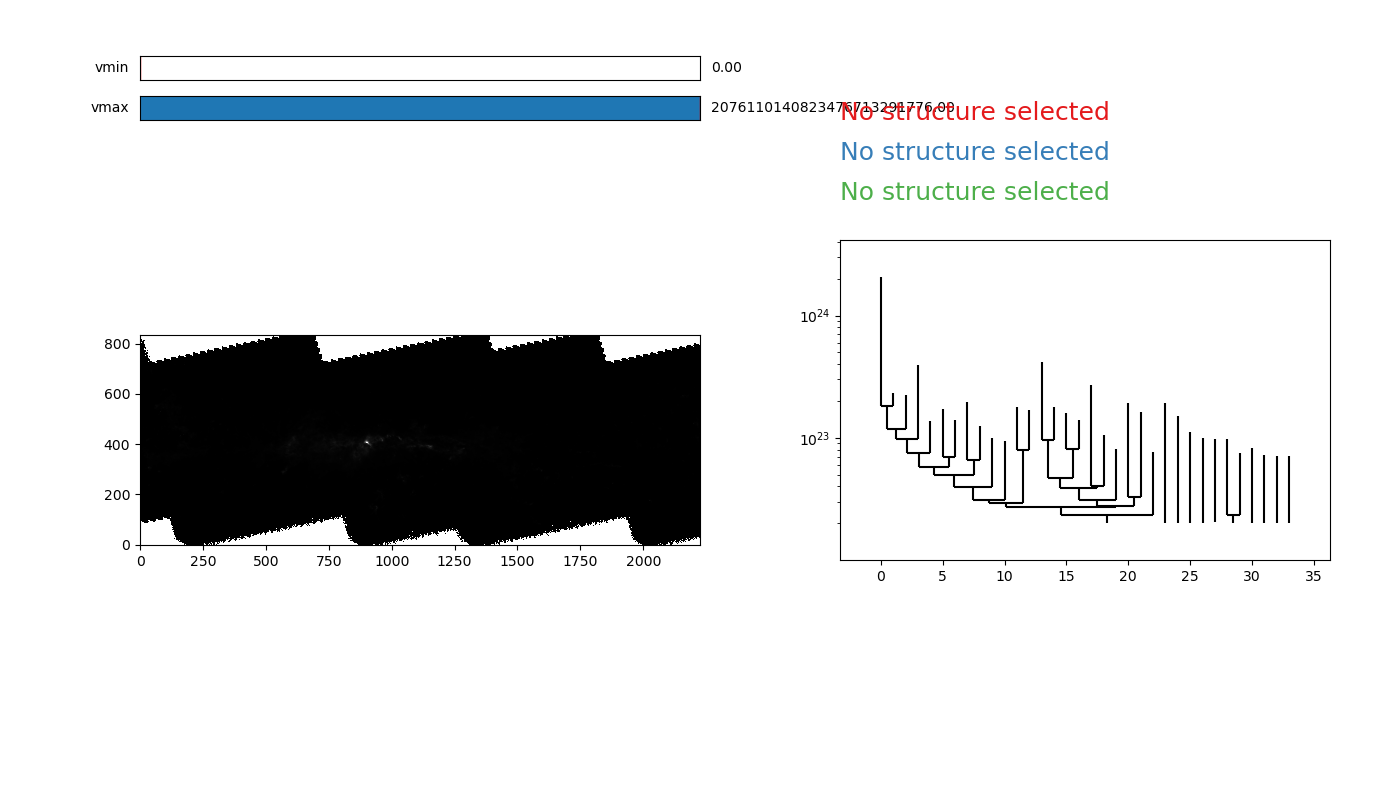

/Users/battersby/anaconda3/lib/python3.8/site-packages/astrodendro/viewer.py:95: UserWarning: `WCSAxes` package required for wcs coordinate display.
  warnings.warn("`WCSAxes` package required for wcs coordinate display.")


In [5]:
%matplotlib nbagg
v = d.viewer()
v.show()

In [6]:
## Highlight two specific structures

hdu = fits.open(path+'column_properunits_conv36_source_only.fits')[0]
#choose two specifc structures to highlight
# Find the structures
structure_36 = d[36]

# Extract the masks
mask_36 = structure_36.get_mask()

# Create FITS HDU objects to contain the masks
mask_hdu_36 = fits.PrimaryHDU(mask_36.astype('short'), hdu.header)
mask_hdu_36.writeto(path+'mask_hdu_36.fits', clobber=True)

structure_46 = d[46]

# Extract the masks
mask_46 = structure_46.get_mask()

# Create FITS HDU objects to contain the masks
mask_hdu_46 = fits.PrimaryHDU(mask_46.astype('short'), hdu.header)
mask_hdu_46.writeto(path+'mask_hdu_46.fits', clobber=True)




<IPython.core.display.Javascript object>


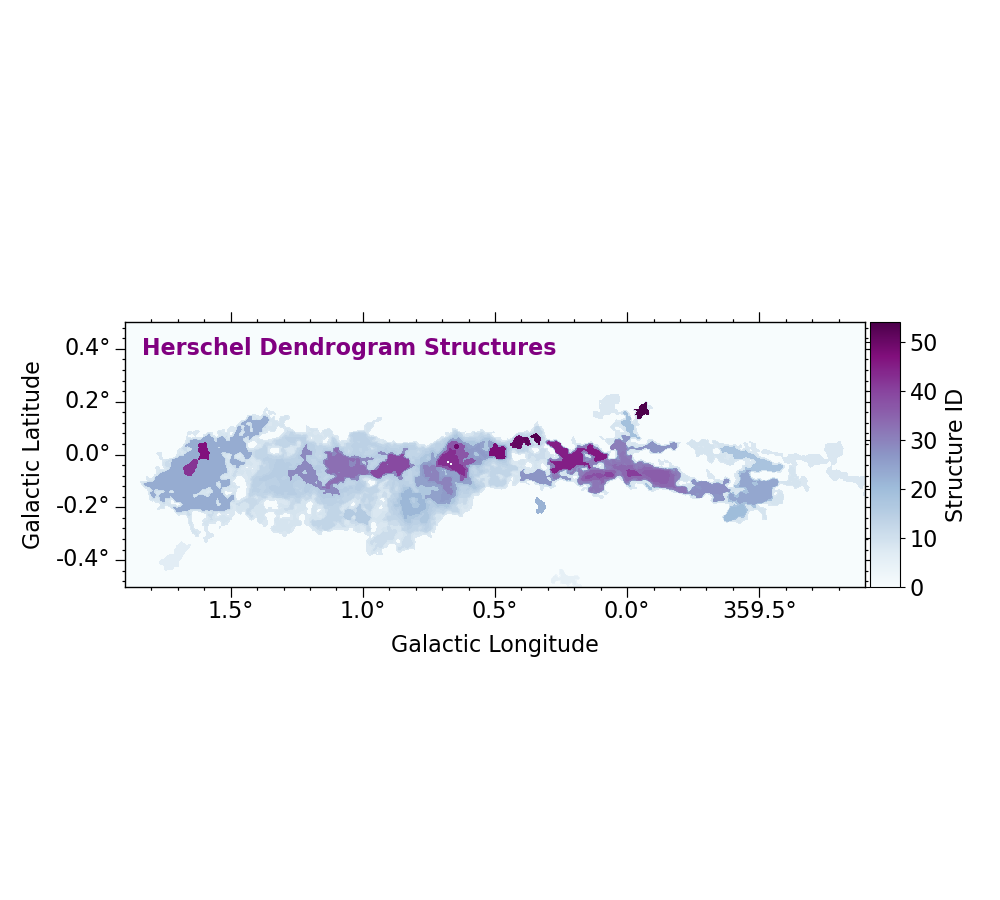

In [7]:
# Plot dendrogram
%matplotlib nbagg

plt.rcParams.update({'font.size': 16}) #set fontsize
fig=aplpy.FITSFigure(path+'cmz_column_dendrogram_mask.fits')
fig.set_theme('publication')
fig.recenter(0.5,0.0, width=2.8, height=1.0)
fig.show_colorscale(cmap='BuPu',vmin=0,vmax=54)
fig.add_colorbar()
fig.colorbar.set_width(0.3)
fig.colorbar.set_axis_label_text('Structure ID')


fig.tick_labels.set_xformat('ddd.d')
fig.tick_labels.set_yformat('ddd.d')

fig.add_label(1.05, 0.40, 'Herschel Dendrogram Structures', color='Purple',weight='bold')

plt.show()

plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/cmz_dendro.pdf',
            format='pdf', dpi=300, bbox_inches='tight')


<IPython.core.display.Javascript object>


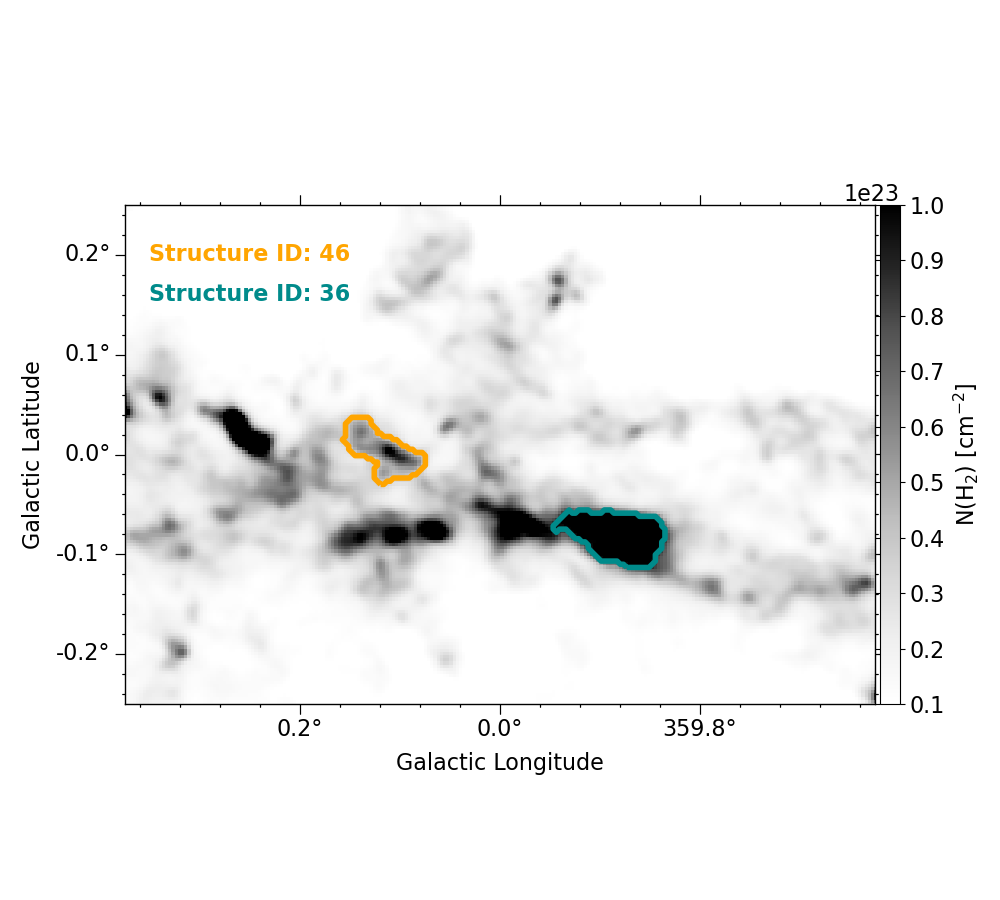

/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


In [9]:
# Plot main image, with two clouds selected
%matplotlib nbagg


fig=aplpy.FITSFigure(path+'column_properunits_conv36_source_only.fits')
fig.set_theme('publication')
fig.recenter(0.0,0.0, width=0.75, height=0.5)
fig.show_colorscale(cmap='Greys',vmin=1e+22,vmax=1e+23)
fig.add_colorbar()
fig.colorbar.set_width(0.2)
fig.colorbar.set_axis_label_text('N(H$_2$) [cm$^{-2}$]')

fig.show_contour(path+'mask_hdu_36.fits', colors='darkcyan', linewidths=4, levels=[0])
fig.show_contour(path+'mask_hdu_46.fits', colors='orange', linewidths=4, levels=[0])

fig.tick_labels.set_xformat('ddd.d')
fig.tick_labels.set_yformat('ddd.d')

plt.rcParams.update({'font.size': 16}) #set fontsize


fig.add_label(0.25, 0.16, 'Structure ID: 36', color='darkcyan',weight='bold')
fig.add_label(0.25, 0.2, 'Structure ID: 46', color='orange',weight='bold')


plt.show()

plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/cmz_dendro_colors.pdf',
            format='pdf', dpi=300, bbox_inches='tight')







In [10]:
# get spectral data out of fits files
hdulist46=fits.open(path+'HC3N_spectrum_idx46.fits')
hdu46=hdulist46[0]
targ46=hdulist46[0].data

hdulist36=fits.open(path+'HC3N_spectrum_idx36.fits')
hdu36=hdulist36[0]
targ36=hdulist36[0].data

arr=np.arange(targ36.size)
h=hdulist36[0].header
print(h)
vel=h['CRVAL1']+(arr-h['CRPIX1'])*h['CDELT1']
vel=vel/1e3 #km/s
#print(vel)


SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                  339                                                  WCSAXES =                    1 / Number of coordinate axes                      CRPIX1  =                170.0 / Pixel coordinate of reference point            CDELT1  =        1776.20482459 / [m/s] Coordinate increment at reference point  CUNIT1  = 'm/s'                / Units of coordinate increment and value        CTYPE1  = 'VOPT'               / Optical velocity (linear)                      CRVAL1  =        135.452824627 / [m/s] Coordinate value at reference point      LONPOLE =                180.0 / [deg] Native longitude of celestial pole       LATPOLE =                  0.0 / [deg] Native latitude of celestial pole        RESTFRQ =        90978989000.0 / [Hz] Li

<IPython.core.display.Javascript object>


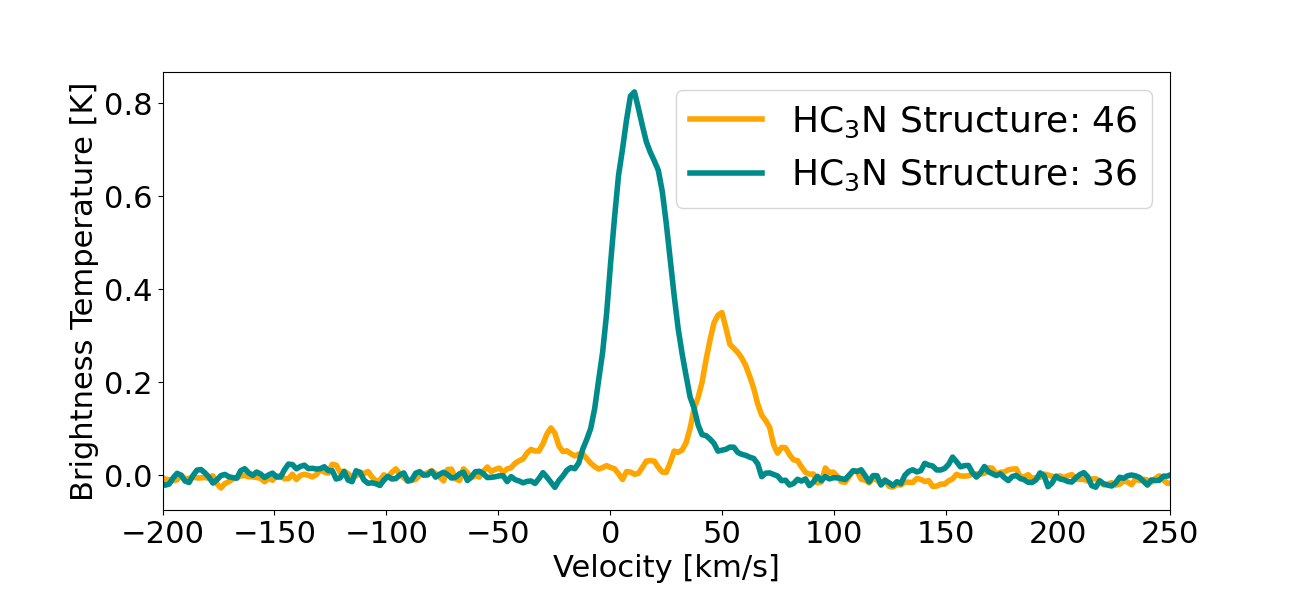

In [14]:
#plot spectrum of these sources
%matplotlib nbagg

plt.rcParams.update({'font.size': 22}) #set fontsize
fig = plt.figure(1,figsize=(13,6))
ax = fig.gca()

plt.plot(vel, targ46, lw=4, color='orange', label=r'HC$_3$N Structure: 46')
plt.plot(vel, targ36, lw=4, color='darkcyan', label=r'HC$_3$N Structure: 36')

plt.xlabel('Velocity [km/s]')
plt.ylabel(r'Brightness Temperature [K]')
ax.set_xlim([-200,250])
plt.gcf().subplots_adjust(bottom=0.15) # make room for x-axis

legend = plt.legend(loc='upper right', shadow=False, fontsize=26)#'x-large')

plt.show()

plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/spectra_46_36.pdf', format='pdf', dpi=100)
plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/spectra_46_36.png', format='png', dpi=100)



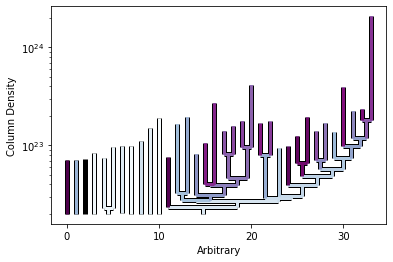

In [15]:
%matplotlib inline
p = d.plotter()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
plt.rcParams.update({'font.size': 24}) #set fontsize
# Plot the whole tree
p.plot_tree(ax, lw=5,color='black')


# Highlight branches
leaves = np.arange(56)+1
cmap = cm.get_cmap('BuPu')
array = np.linspace(0,1,56) #0 to 1 with 56 different bins
rgb_leaves = cmap(array)

i=0
while i < 56:
    p.plot_tree(ax, [i], color=[rgb_leaves[i]], lw=3)
    i+=1


ax.set_xlabel("Arbitrary")
ax.set_ylabel("Column Density")

#ax.text(20,6e23, 'ID: 36', color='black')
#ax.annotate('ID: 36', xy=(20,4e23), xycoords='data', xytext=(18, 9e23),
#            arrowprops=dict(facecolor='darkcyan', width=1, headwidth=5, shrink=0.05), fontsize=16, color='darkcyan')

#ax.annotate('ID: 46', xy=(15,1e23), xycoords='data', xytext=(12, 3.5e23),
#            arrowprops=dict(facecolor='orange', width=1, headwidth=5, shrink=0.05), fontsize=16, color='orange')

plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/CMZ_full_dendro_tree_noannotation.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

In [21]:
strnum=[39,105,106]
s2=d[strnum[0]]
d.leaves
####OKAY, below seems broken bc structure numbers changed. OOOOOOPS WHYYYY

##I think the below is OUTDATED - use plot_dendro_PDFs instead.


[<Structure type=leaf idx=0>,
 <Structure type=leaf idx=1>,
 <Structure type=leaf idx=2>,
 <Structure type=leaf idx=4>,
 <Structure type=leaf idx=5>,
 <Structure type=leaf idx=6>,
 <Structure type=leaf idx=7>,
 <Structure type=leaf idx=10>,
 <Structure type=leaf idx=16>,
 <Structure type=leaf idx=20>,
 <Structure type=leaf idx=21>,
 <Structure type=leaf idx=22>,
 <Structure type=leaf idx=24>,
 <Structure type=leaf idx=28>,
 <Structure type=leaf idx=30>,
 <Structure type=leaf idx=33>,
 <Structure type=leaf idx=36>,
 <Structure type=leaf idx=38>,
 <Structure type=leaf idx=39>,
 <Structure type=leaf idx=40>,
 <Structure type=leaf idx=41>,
 <Structure type=leaf idx=42>,
 <Structure type=leaf idx=43>,
 <Structure type=leaf idx=45>,
 <Structure type=leaf idx=46>,
 <Structure type=leaf idx=47>,
 <Structure type=leaf idx=48>,
 <Structure type=leaf idx=49>,
 <Structure type=leaf idx=51>,
 <Structure type=leaf idx=52>,
 <Structure type=leaf idx=53>,
 <Structure type=leaf idx=54>,
 <Structure typ

In [16]:
# Now identifying and separating different regions
# from "dendrogram_structure_regions.rtf"
#sgrb2.fits —> 31
#r_gt_100pc.fits —> 61 is 1.1deg stuff and 41 is 1.6deg stuff
#r_lt_100pc.fits —> 39 most, but also
#105 are bricklets c and d
#106 is bricklet b

#—> Okay, can do this, but the dendrograms do not all have the same “column cutoff”
#so we use the highest column cutoff for any dendrogram on all of them for comparison
# This is about 6 x 10^22 cm^-2 or about 10^22.8 cm^-2

#Might want to change this later.... does not do closed contours perfectly

# want to isolate each of these structures and save as a mask
def structure_masks(string,colfile,strnum):   
    if len(strnum)==1:
        struct = d[strnum[0]]
        mask=struct.get_mask()
    if len(strnum)==2:
        s1=d[strnum[0]]
        s2=d[strnum[1]]
        mask=s1.get_mask()+s2.get_mask()
    if len(strnum)==3:
        s1=d[strnum[0]]
        s2=d[strnum[1]]
        s3=d[strnum[2]]
        mask=s1.get_mask()+s2.get_mask()+s3.get_mask()
    mask_hdu = fits.PrimaryHDU(mask.astype('short'), hdu.header)
    mask_hdu.writeto(path+string+'_mask.fits', clobber=True)
    fh = fits.open(colfile)
    fh2=fits.open(colfile)
    fh2[0].data[np.where(fh2[0].data < 6e22)] = 0.0
    fh2[0].data[np.where(fh2[0].data >= 6e22)] = 1.0
    fh[0].data=fh[0].data*fh2[0].data*mask
#    fh[0].data=fh[0].data*mask
    fh.writeto(path+string+'.fits', clobber=True)
    fh2.writeto(path+'test.fits',clobber=True)

    
colfile=path+'column_properunits_conv36_source_only.fits'
# Sgr B2
strnum=[31]
structure_masks('sgrb2',colfile,strnum)

# Inner 100 pc
strnum=[39,105,106]
structure_masks('r_lt_100pc',colfile,strnum)

#Outer 100 pc
strnum=[61,41]
structure_masks('r_gt_100pc',colfile, strnum)


/Users/battersby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less
/Users/battersby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal


KeyError: 105

In [94]:
#continued from above..
%matplotlib nbagg
# Find the structures
structure_35 = d[74]

# Extract the masks
mask_35 = structure_35.get_mask()

# Create FITS HDU objects to contain the masks
mask_hdu_35 = fits.PrimaryHDU(mask_35.astype('short'), hdu.header)
#mask_hdu_35=mask_hdu_35[0].data*hdu[0].data
mask_hdu_35.writeto(path+'test.fits', clobber=True)


# We then use APLpy to make the final plot
fig = aplpy.FITSFigure(hdu, figsize=(8, 6))
fig.show_colorscale(cmap='Blues_r', vmin=0.1e+22,vmax=1e+23)
fig.show_contour(mask_hdu_35, colors='red', linewidths=0.5)
#fig.show_contour(mask2_hdu, colors='orange', linewidths=0.5)
#fig.show_contour(mask3_hdu, colors='yellow', linewidths=0.5)
#fig.show_contour(mask4_hdu, colors='yellow', linewidths=0.5)
#fig.show_contour(mask_hdu, colors='yellow', linewidths=0.5)
fig.tick_labels.set_xformat('dd.dd')
fig.tick_labels.set_yformat('dd.dd')

TypeError: 'PrimaryHDU' object does not support indexing

In [10]:
[x for x in d.all_structures]

#  [x.get_mask() for x in dend.all_structures]

[<Structure type=branch idx=1>,
 <Structure type=leaf idx=2>,
 <Structure type=leaf idx=3>,
 <Structure type=leaf idx=0>,
 <Structure type=leaf idx=4>,
 <Structure type=leaf idx=5>,
 <Structure type=leaf idx=6>,
 <Structure type=branch idx=7>,
 <Structure type=leaf idx=8>,
 <Structure type=leaf idx=10>,
 <Structure type=leaf idx=9>,
 <Structure type=leaf idx=11>,
 <Structure type=leaf idx=14>,
 <Structure type=branch idx=12>,
 <Structure type=leaf idx=13>,
 <Structure type=leaf idx=16>,
 <Structure type=leaf idx=15>,
 <Structure type=leaf idx=19>,
 <Structure type=leaf idx=22>,
 <Structure type=leaf idx=40>,
 <Structure type=leaf idx=60>,
 <Structure type=branch idx=20>,
 <Structure type=leaf idx=58>,
 <Structure type=branch idx=17>,
 <Structure type=leaf idx=94>,
 <Structure type=branch idx=24>,
 <Structure type=branch idx=18>,
 <Structure type=branch idx=21>,
 <Structure type=leaf idx=98>,
 <Structure type=branch idx=23>,
 <Structure type=branch idx=25>,
 <Structure type=branch idx=2

In [ ]:
# from adam:
 catalog = ppv_catalog(dend, metadata)
 for ii,row in enumerate(catalog):

        structure = dend[row['_idx']]
        mask = structure.get_mask()

<IPython.core.display.Javascript object>


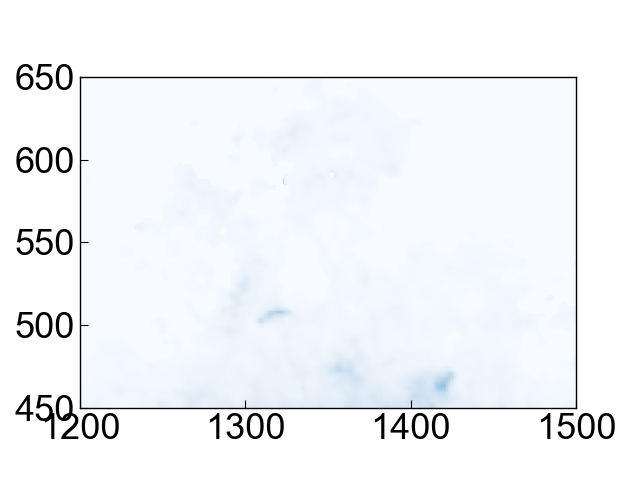

(450.0, 650.0)

In [38]:
%matplotlib nbagg

p = d.plotter()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.imshow(hdu.data, origin='lower', interpolation='nearest',
          cmap=plt.cm.Blues, vmax=1e+23)

for leaf in d.leaves:

    p.plot_contour(ax, structure=leaf, lw=3, colors='red')

#    s = PPStatistic(leaf)
#    ellipse = s.to_mpl_ellipse(edgecolor='orange', facecolor='none')

#    ax.add_patch(ellipse)

for branch in d.trunk:
    p.plot_contour(ax,structure=branch, lw=3, colors='yellow')

ax.set_xlim(1200., 1500.)
ax.set_ylim(450., 650.)